In [1]:
# DS Modules
import numpy as np
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers
import helpers
import acquire

In this note

In [2]:
df = acquire.both_get_data()
df.columns = [helpers.util.make_valid_py_id(col) for col in df]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df, _ , _ = helpers.prep.train_test_validate_split(df)

In [4]:
red = df[df.type =='red']
white = df[df.type =='white']

In [5]:
xf = helpers.prep.upsample_target(df, 'type', 'red')

In [6]:
xf = xf.reset_index().drop(columns='index')

In [7]:
xf.type.value_counts()

white    2951
red      2950
Name: type, dtype: int64

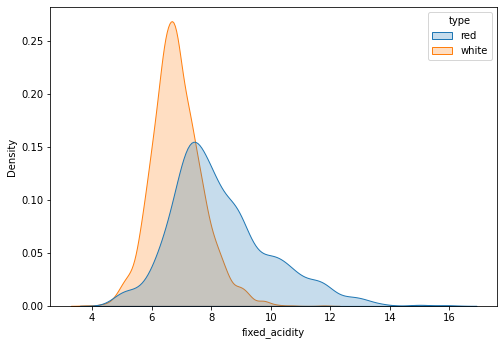

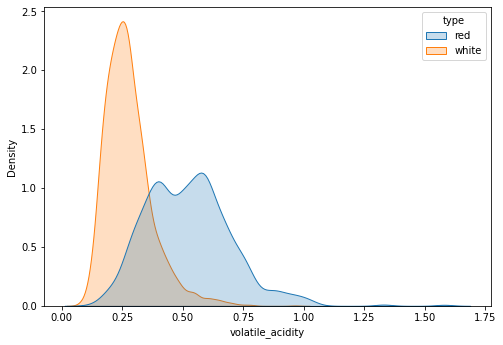

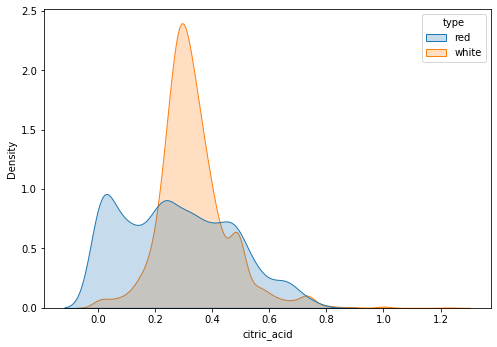

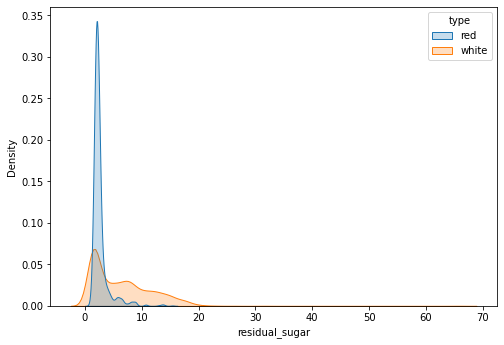

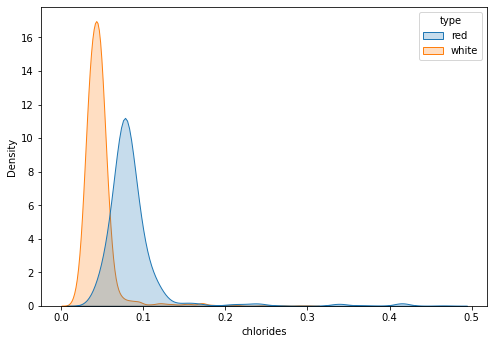

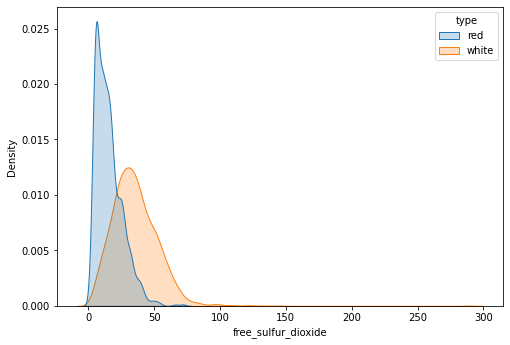

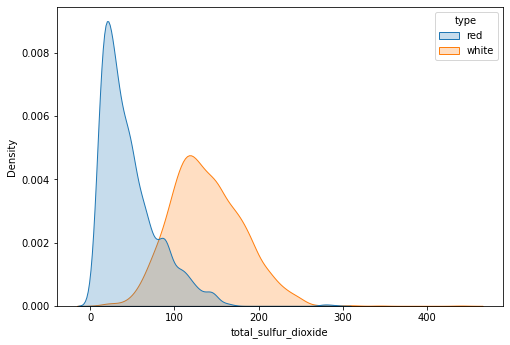

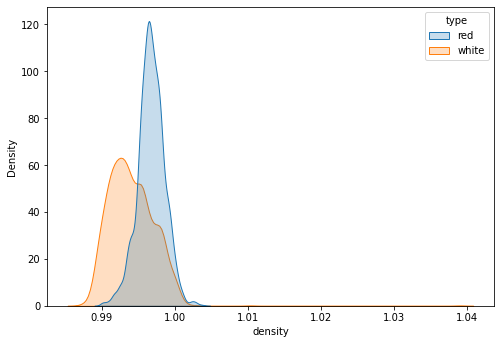

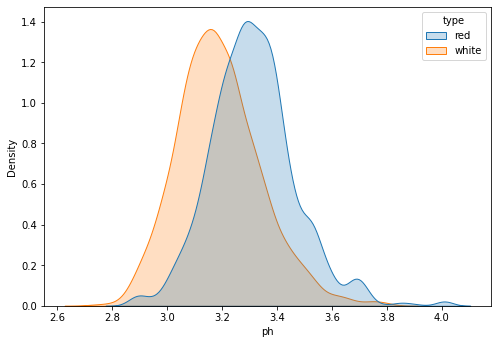

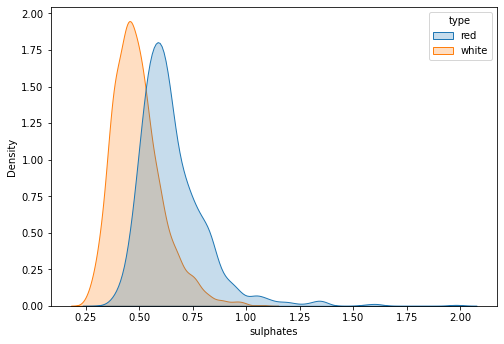

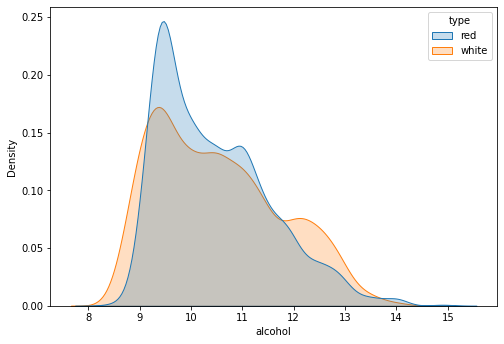

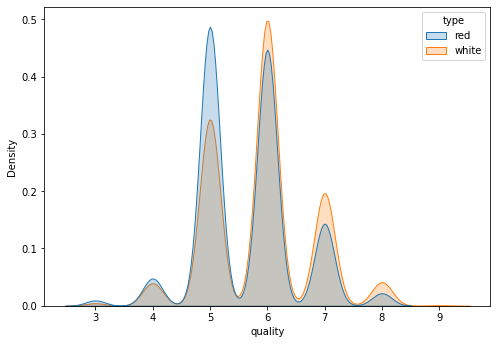

In [8]:
for col in df.drop(columns=['type']):
    plt.figure(figsize=[8,5.5])
    sns.kdeplot(data=xf, x=col, hue='type', shade=True)

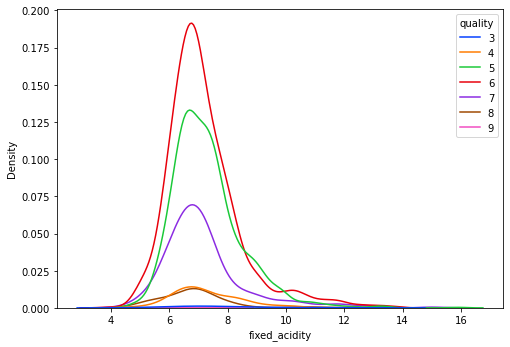

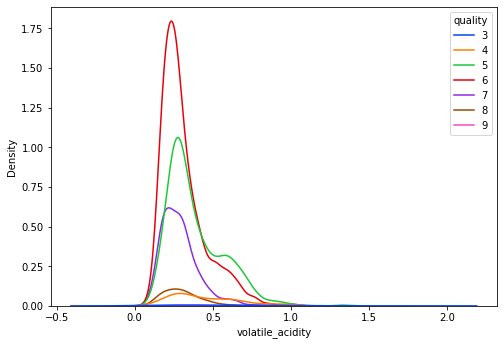

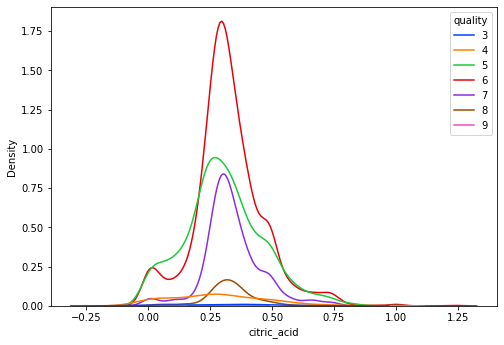

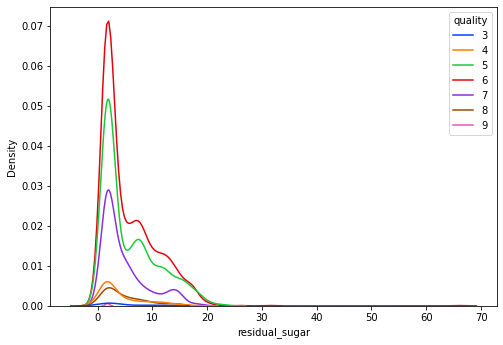

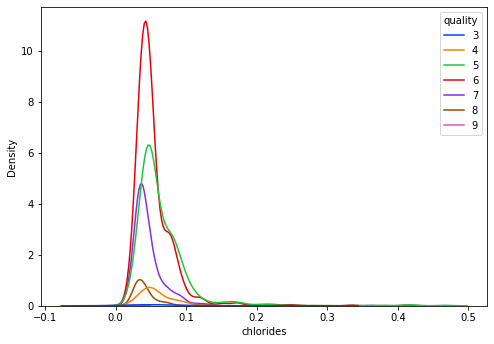

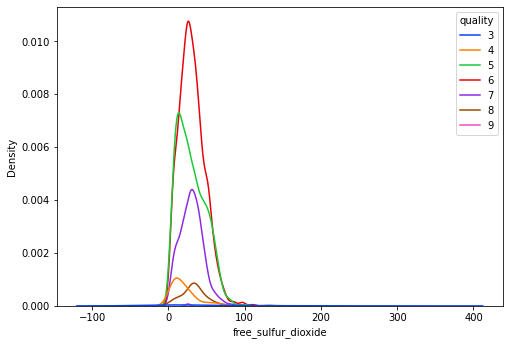

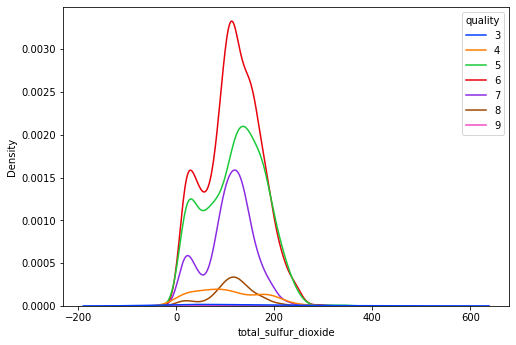

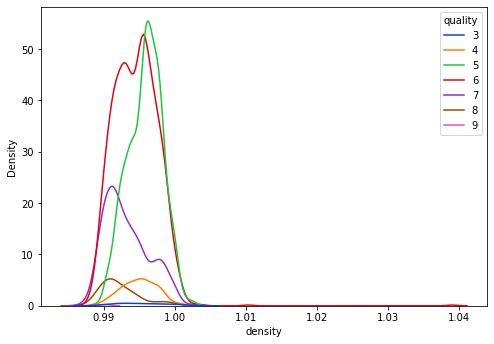

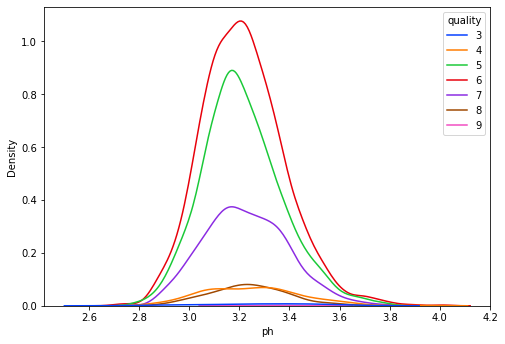

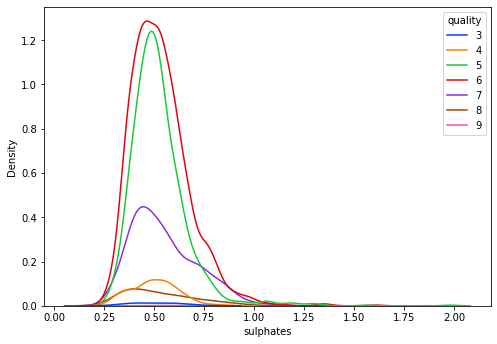

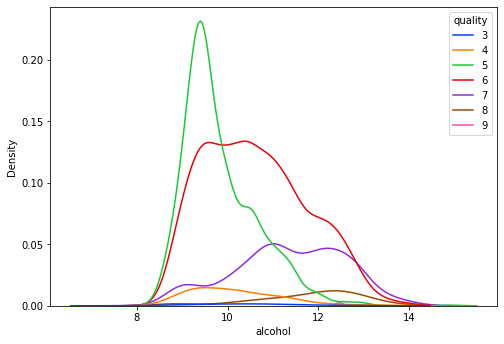

In [9]:
for col in df.drop(columns=['quality', 'type']):
    plt.figure(figsize=[8,5.5])
    sns.kdeplot(data=df, x=col, hue='quality', shade=False, palette='bright')

In [10]:
helpers.stats.spearman_correllation_test(df, 'quality', 'alcohol')

{'reject': True,
 'h0': "The samples of 'quality' and 'alcohol' are independant",
 'stat_name': 'correlation',
 'stat': 0.4486038940231569,
 'p_value': 2.2672052606578507e-192,
 'alpha': 0.05}

In [11]:
helpers.stats.pearson_correllation_test(df, 'quality', 'alcohol')

{'reject': True,
 'h0': "The samples of 'quality' and 'alcohol' are independant",
 'stat_name': 'correlation',
 'stat': 0.4450695110833386,
 'p_value': 4.9860109519873025e-189,
 'alpha': 0.05}

# Hypothesis testing

### Hypothesis: Sugar and alcohol content directly to correlates to wine density


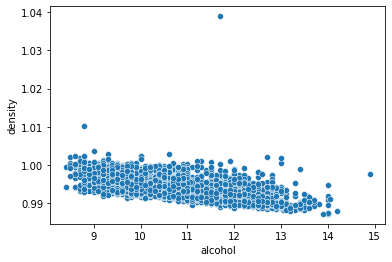

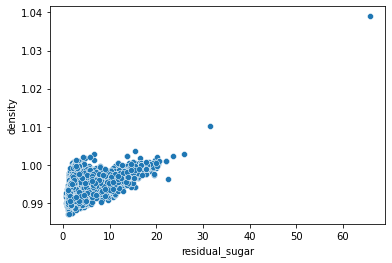

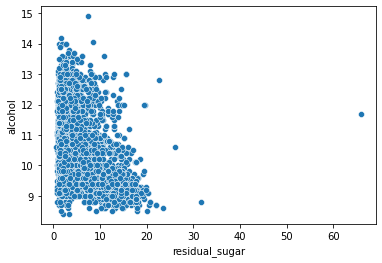

In [12]:
sns.scatterplot(data=df, x='alcohol', y='density', )
plt.show()
sns.scatterplot(data=df, x='residual_sugar', y='density', )
plt.show()
sns.scatterplot(data=df, x='residual_sugar', y='alcohol', )
plt.show()

### Hypothesis: For white wines, the higher acid content the higher quality


In [13]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
5898,6.3,0.28,0.30,6.60,0.208,60.0,154.0,0.99478,3.10,0.40,9.4,6,white
5178,7.4,0.25,0.28,7.25,0.028,14.0,78.0,0.99238,2.94,0.37,11.5,7,white
6307,7.2,0.33,0.28,1.40,0.034,26.0,109.0,0.99246,3.28,0.57,10.6,6,white
6298,6.8,0.30,0.33,12.80,0.041,60.0,168.0,0.99659,3.10,0.56,9.8,5,white
2536,6.1,0.36,0.58,15.00,0.044,42.0,115.0,0.99780,3.15,0.51,9.0,5,white


##### **Volatile Acidity**

In [14]:
helpers.stats.spearman_correllation_test(df, 'quality', 'volatile_acidity'),\
helpers.stats.pearson_correllation_test(df, 'quality', 'volatile_acidity')

({'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.24841498508249887,
  'p_value': 6.643389823480033e-56,
  'alpha': 0.05},
 {'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.25974535829738643,
  'p_value': 3.9429151592280524e-61,
  'alpha': 0.05})

In [15]:
helpers.stats.spearman_correllation_test(red, 'quality', 'volatile_acidity'),\
helpers.stats.pearson_correllation_test(red, 'quality', 'volatile_acidity')

({'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.37776221003965843,
  'p_value': 1.7314541051063963e-33,
  'alpha': 0.05},
 {'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.3921948601369793,
  'p_value': 3.5078934319582714e-36,
  'alpha': 0.05})

In [16]:
helpers.stats.spearman_correllation_test(white, 'quality', 'volatile_acidity'),\
helpers.stats.pearson_correllation_test(white, 'quality', 'volatile_acidity')

({'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.18200185397256996,
  'p_value': 2.1456758857166405e-23,
  'alpha': 0.05},
 {'reject': True,
  'h0': "The samples of 'quality' and 'volatile_acidity' are independant",
  'stat_name': 'correlation',
  'stat': -0.17426812665090968,
  'p_value': 1.4869319405697779e-21,
  'alpha': 0.05})

##### **Fixed Acidity**

In [29]:
helpers.stats.spearman_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.09369780971684037,
 'p_value': 4.602358052209382e-09,
 'alpha': 0.05}

In [18]:
helpers.stats.pearson_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.06591377451024978,
 'p_value': 3.814831647004491e-05,
 'alpha': 0.05}

In [19]:
helpers.stats.spearman_correllation_test(red, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': 0.1626076369963062,
 'p_value': 4.881979840288694e-07,
 'alpha': 0.05}

In [20]:
helpers.stats.pearson_correllation_test(red, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': 0.18279515424272053,
 'p_value': 1.4651608698783238e-08,
 'alpha': 0.05}

In [21]:
helpers.stats.spearman_correllation_test(white, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.08643213755927666,
 'p_value': 2.5753180931520674e-06,
 'alpha': 0.05}

In [22]:
helpers.stats.pearson_correllation_test(white, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.12127032621790985,
 'p_value': 3.858913664126592e-11,
 'alpha': 0.05}

##### **Citric Acid**

In [23]:
helpers.stats.spearman_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.09369780971684037,
 'p_value': 4.602358052209382e-09,
 'alpha': 0.05}

In [24]:
helpers.stats.pearson_correllation_test(df, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.06591377451024978,
 'p_value': 3.814831647004491e-05,
 'alpha': 0.05}

In [25]:
helpers.stats.spearman_correllation_test(red, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': 0.1626076369963062,
 'p_value': 4.881979840288694e-07,
 'alpha': 0.05}

In [26]:
helpers.stats.pearson_correllation_test(red, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': 0.18279515424272053,
 'p_value': 1.4651608698783238e-08,
 'alpha': 0.05}

In [27]:
helpers.stats.spearman_correllation_test(white, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.08643213755927666,
 'p_value': 2.5753180931520674e-06,
 'alpha': 0.05}

In [28]:
helpers.stats.pearson_correllation_test(white, 'quality', 'fixed_acidity')

{'reject': True,
 'h0': "The samples of 'quality' and 'fixed_acidity' are independant",
 'stat_name': 'correlation',
 'stat': -0.12127032621790985,
 'p_value': 3.858913664126592e-11,
 'alpha': 0.05}

### Hypothesis: For red wines, residual sugar content lowers quality score


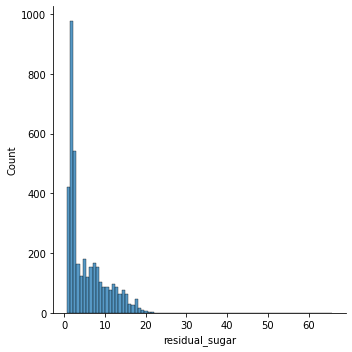

In [44]:
sns.displot(df.residual_sugar)

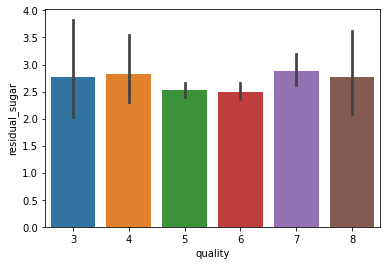

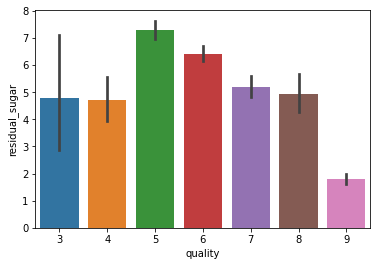

In [62]:
sns.barplot(data=red, x='quality', y='residual_sugar')
plt.show()
sns.barplot(data=white, x='quality', y='residual_sugar')
plt.show()

In [45]:
df[df.quality == 9]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white


In [48]:
df[df.quality == 8].volatile_acidity.describe(),\
df[df.quality == 8].residual_sugar.describe()

(count    123.000000
 mean       0.300854
 std        0.121786
 min        0.120000
 25%        0.210000
 50%        0.280000
 75%        0.360000
 max        0.850000
 Name: volatile_acidity, dtype: float64,
 count    123.000000
 mean       4.720732
 std        3.722274
 min        0.800000
 25%        1.800000
 50%        3.600000
 75%        7.025000
 max       14.800000
 Name: residual_sugar, dtype: float64)

### Hypothesis: Sulfates will have negative impact on quality for both


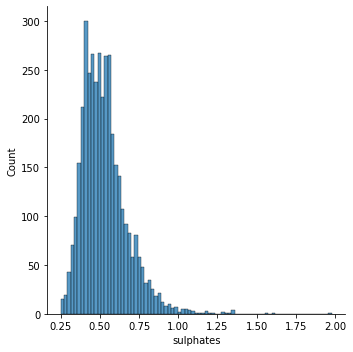

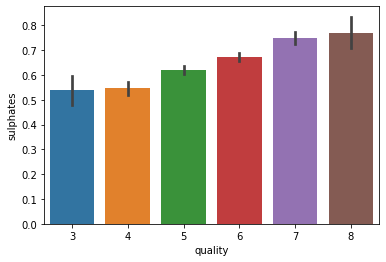

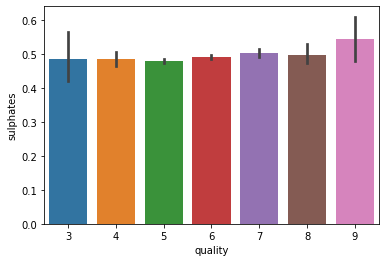

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
5898,6.3,0.28,0.30,6.60,0.208,60.0,154.0,0.99478,3.10,0.40,9.4,6,white
5178,7.4,0.25,0.28,7.25,0.028,14.0,78.0,0.99238,2.94,0.37,11.5,7,white
6307,7.2,0.33,0.28,1.40,0.034,26.0,109.0,0.99246,3.28,0.57,10.6,6,white
6298,6.8,0.30,0.33,12.80,0.041,60.0,168.0,0.99659,3.10,0.56,9.8,5,white
2536,6.1,0.36,0.58,15.00,0.044,42.0,115.0,0.99780,3.15,0.51,9.0,5,white


In [64]:
sns.displot(df.sulphates)
plt.show()
sns.barplot(data=red, x='quality', y='sulphates')
plt.show()
sns.barplot(data=white, x='quality', y='sulphates')
plt.show()

### Hypothesis: High volitile acid content lowers quality for both


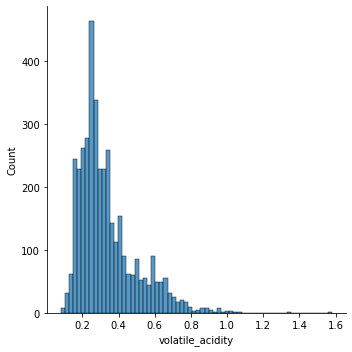

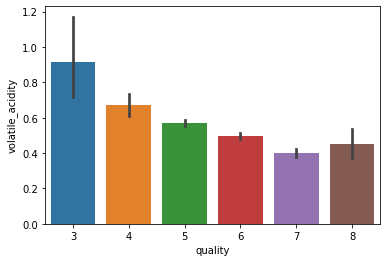

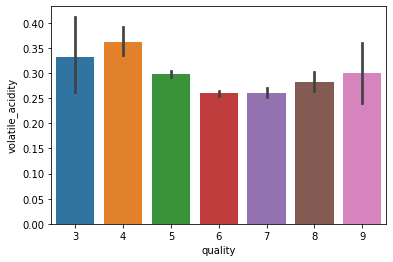

In [65]:
sns.displot(df.volatile_acidity)
plt.show()
sns.barplot(data=red, x='quality', y='volatile_acidity')
plt.show()
sns.barplot(data=white, x='quality', y='volatile_acidity')
plt.show()

### Hypothesis: White and red wines may need predicted separately

U.S. legal limits of Volatile Acidity:   
Red Table Wine 1.2 g/L  
White Table Wine 1.1 g/L

In [30]:
df.volatile_acidity.describe()

count    3898.000000
mean        0.336632
std         0.161907
min         0.080000
25%         0.220000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile_acidity, dtype: float64

In [31]:
df[df.volatile_acidity > 1.1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
126,8.2,1.33,0.0,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5,red
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,red
127,8.1,1.33,0.0,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5,red


In [32]:
df.quality.describe()

count    3898.00000
mean        5.81529
std         0.88250
min         3.00000
25%         5.00000
50%         6.00000
75%         6.00000
max         9.00000
Name: quality, dtype: float64

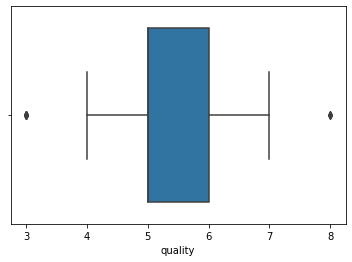

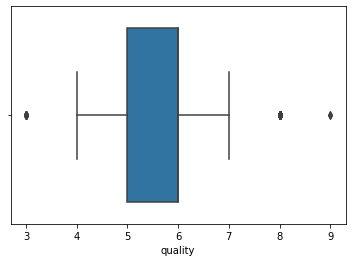

In [35]:
sns.boxplot(data = df[df.volatile_acidity > .6], x='quality')
plt.show()
sns.boxplot(data = df[df.volatile_acidity < .6], x='quality')
plt.show()

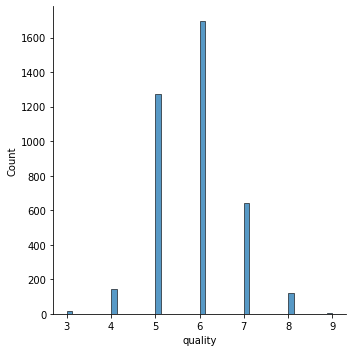

In [36]:
sns.displot(data=df, x='quality')

In [41]:
df.corr().density, red.corr().density, white.corr().density

(fixed_acidity           0.447856
 volatile_acidity        0.280807
 citric_acid             0.093544
 residual_sugar          0.565526
 chlorides               0.360790
 free_sulfur_dioxide     0.010753
 total_sulfur_dioxide    0.033499
 density                 1.000000
 ph                      0.006531
 sulphates               0.255396
 alcohol                -0.678659
 quality                -0.301816
 Name: density, dtype: float64,
 fixed_acidity           0.643195
 volatile_acidity        0.035867
 citric_acid             0.344298
 residual_sugar          0.318798
 chlorides               0.208157
 free_sulfur_dioxide     0.024374
 total_sulfur_dioxide    0.071516
 density                 1.000000
 ph                     -0.301704
 sulphates               0.141979
 alcohol                -0.497830
 quality                -0.142329
 Name: density, dtype: float64,
 fixed_acidity           0.265689
 volatile_acidity        0.044178
 citric_acid             0.150419
 residual_sugar   

Is PH a reflection of the 3 acids columns?

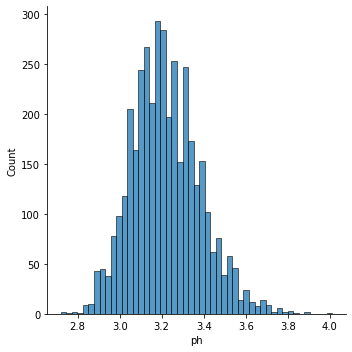

In [57]:
sns.displot(df.ph)

<AxesSubplot:>

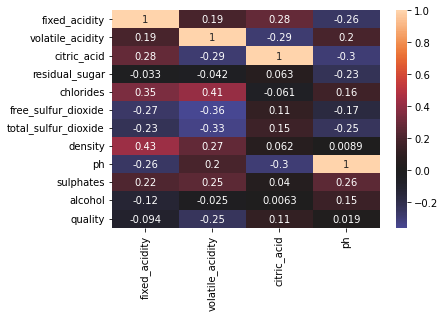

In [56]:
c = df.corr(method='spearman')[['fixed_acidity','volatile_acidity','citric_acid','ph']]
sns.heatmap(c, center=0, annot=True)

### Is total SO2 - free S02 indicative of age / quality?

In [66]:
df['used_sulfur_dioxide'] = df.total_sulfur_dioxide - df.free_sulfur_dioxide
df['used_sulfur_dioxide'].describe()


count    3898.000000
mean       85.256798
std        45.281496
min         3.000000
25%        55.000000
50%        86.000000
75%       116.000000
max       293.500000
Name: used_sulfur_dioxide, dtype: float64

In [67]:
df.corr(method='spearman').used_sulfur_dioxide

fixed_acidity          -0.195837
volatile_acidity       -0.288099
citric_acid             0.141782
residual_sugar          0.422893
chlorides              -0.259040
free_sulfur_dioxide     0.543358
total_sulfur_dioxide    0.957211
density                 0.058433
ph                     -0.243970
sulphates              -0.251664
alcohol                -0.298834
quality                -0.089741
used_sulfur_dioxide     1.000000
Name: used_sulfur_dioxide, dtype: float64

In [69]:
red = df[df.type =='red']
white = df[df.type =='white']

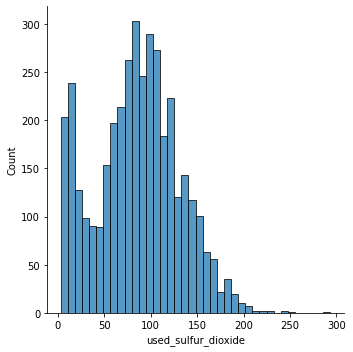

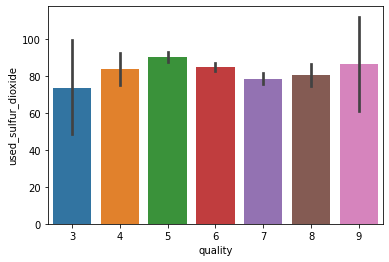

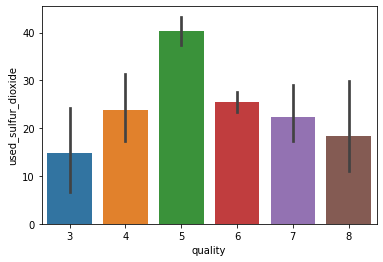

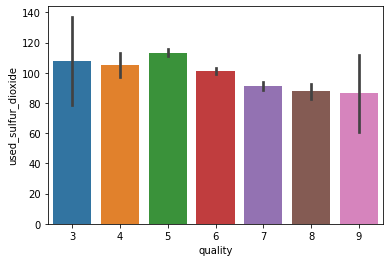

In [70]:
sns.displot(df.used_sulfur_dioxide)
plt.show()
sns.barplot(data=df, x='quality', y='used_sulfur_dioxide')
plt.show()
sns.barplot(data=red, x='quality', y='used_sulfur_dioxide')
plt.show()
sns.barplot(data=white, x='quality', y='used_sulfur_dioxide')
plt.show()

## tri-variate exploration

In [111]:
xf = df[(df.quality > 6)| (df.quality < 5)]

In [112]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type,used_sulfur_dioxide
5898,6.3,0.28,0.30,6.60,0.208,60.0,154.0,0.99478,3.10,0.40,9.4,6,white,94.0
5178,7.4,0.25,0.28,7.25,0.028,14.0,78.0,0.99238,2.94,0.37,11.5,7,white,64.0
6307,7.2,0.33,0.28,1.40,0.034,26.0,109.0,0.99246,3.28,0.57,10.6,6,white,83.0
6298,6.8,0.30,0.33,12.80,0.041,60.0,168.0,0.99659,3.10,0.56,9.8,5,white,108.0
2536,6.1,0.36,0.58,15.00,0.044,42.0,115.0,0.99780,3.15,0.51,9.0,5,white,73.0


In [113]:
import plotly.express as px
fig = px.scatter_3d(xf, 
                    x='total_sulfur_dioxide', 
                    y='volatile_acidity', 
                    z='alcohol',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [107]:
import plotly.express as px
fig = px.scatter_3d(xf, 
                    x='free_sulfur_dioxide', 
                    y='total_sulfur_dioxide', 
                    z='sulphates',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

In [108]:
xf.corr().quality

fixed_acidity          -0.086914
volatile_acidity       -0.385871
citric_acid             0.154278
residual_sugar          0.048008
chlorides              -0.233633
free_sulfur_dioxide     0.126720
total_sulfur_dioxide    0.028692
density                -0.264270
ph                     -0.040518
sulphates               0.087593
alcohol                 0.382784
quality                 1.000000
used_sulfur_dioxide    -0.023750
Name: quality, dtype: float64

In [115]:
import plotly.express as px
xf = df[(df.quality > 7)| (df.quality < 5)]
fig = px.scatter_3d(xf, 
                    x='alcohol', 
                    y='fixed_acidity', 
                    z='volatile_acidity',
                    color='quality'
                    )
fig.update_layout(width=700, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()